In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [64]:
# Loading customer data
data=pd.read_csv("Mall_Customers.csv")

In [65]:
# First 5 rows in dataframe
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [67]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [68]:
# checking duplcated values
data.duplicated().sum()

0

In [70]:

# data = data.drop(columns=['CustomerID', 'Age','Gender'], axis=1)
X = data.iloc[:,[3,4]].values

In [34]:
# Checking correct number of clusters for our dataset 
# Using WCSS-->Within cluster Sum of squares


In [73]:
# Elbow method-for finding number of cluster
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'wcss')

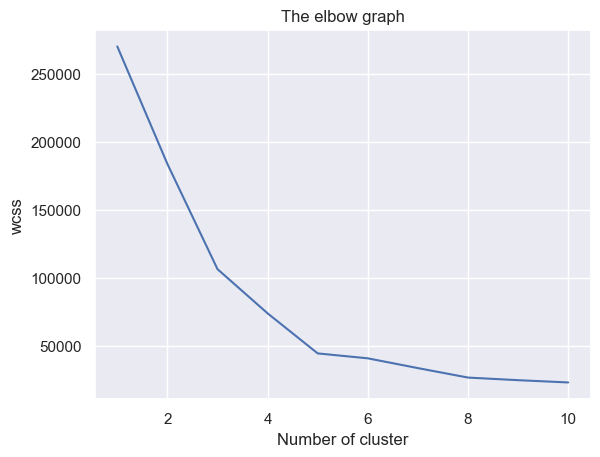

In [74]:
# plotting elbow-graph
sns.set()
plt.plot(range(1,11),wcss)
plt.title("The elbow graph")
plt.xlabel("Number of cluster")
plt.ylabel('wcss')

In [75]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
# labels for each datapoint
y=kmeans.fit_predict(X)

In [76]:
np.unique(y)

array([0, 1, 2, 3, 4])

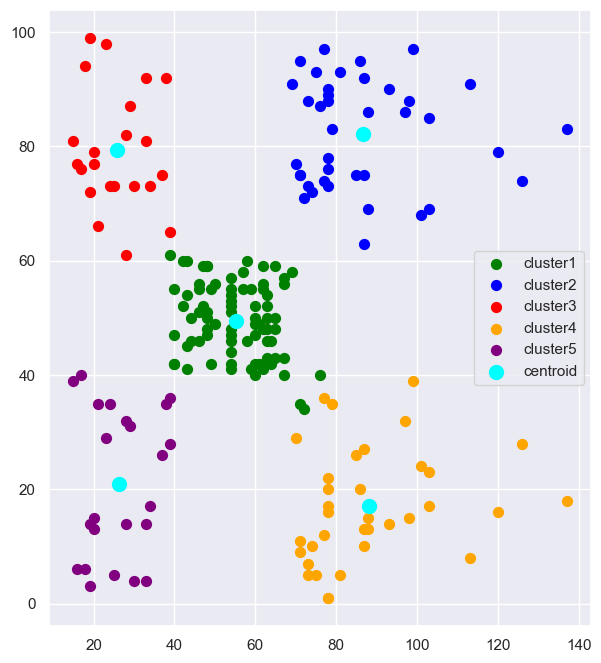

In [77]:
plt.figure(figsize=(7, 8))
plt.scatter(X[y == 0, 0], X[y == 0, 1], s=50, c='green', label='cluster1')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=50, c='blue', label='cluster2')
plt.scatter(X[y == 2, 0], X[y == 2, 1], s=50, c='red', label='cluster3')
plt.scatter(X[y == 3, 0], X[y == 3, 1], s=50, c='orange', label='cluster4')
plt.scatter(X[y == 4, 0], X[y == 4, 1], s=50, c='purple', label='cluster5')

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='cyan', label="centroid")
plt.xlabel("Annual 
plt.legend()
plt.show()


In [61]:
for i in range(5):  # Checking for clusters 0 to 4
    print(f"Number of points in cluster {i}: {(y == i).sum()}")

Number of points in cluster 0: 81
Number of points in cluster 1: 39
Number of points in cluster 2: 22
Number of points in cluster 3: 35
Number of points in cluster 4: 23


In [62]:
plt.figure(figsize=(7, 8))

colors = ['green', 'blue', 'red', 'orange', 'purple']
labels = ['cluster1', 'cluster2', 'cluster3', 'cluster4', 'cluster5']

# Plot each cluster if it has data points
for i in range(5):
    if (y == i).any():  # Check if there are any points in the cluster
        plt.scatter(X[y == i, 0], X[y == i, 1], s=50, c=colors[i], label=labels[i])

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='cyan', label="centroid")
plt.legend()
plt.show()



InvalidIndexError: (array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False]), 0)

<Figure size 700x800 with 0 Axes>